# 預處理

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# np.random.seed(10)

In [3]:
from keras.datasets import mnist

In [4]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

11493376/11490434 [==============================] - 79s 7us/step


In [5]:
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap = 'binary')
    plt.show()

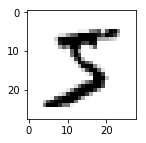

In [6]:
plot_image(x_train_image[0])

In [7]:
print(y_train_label[0])

5


In [8]:
def plot_images_labels_prediction(images, labels, prediction, idx, num):
    fig = plt.gcf()
    fig.set_size_inches(15, 20)
    for i in range(0, num):
        ax = plt.subplot(10, 10, 1 + i)
        ax.imshow(images[idx], cmap = 'binary')
        title = 'label: ' + str(labels[idx])
        if len(prediction) > 0:
            title = title + '\n' + 'prediction: ' + str(prediction[idx])
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

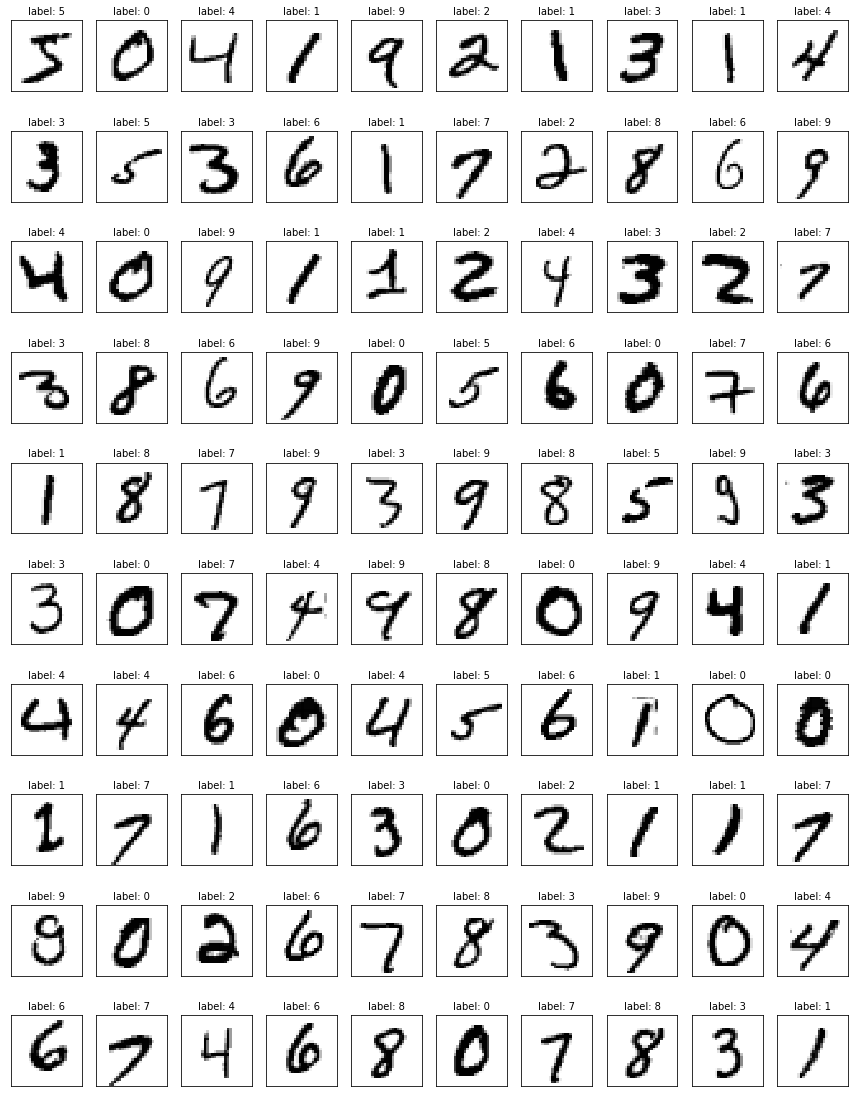

In [9]:
plot_images_labels_prediction(x_train_image, y_train_label, [], 0, 100)

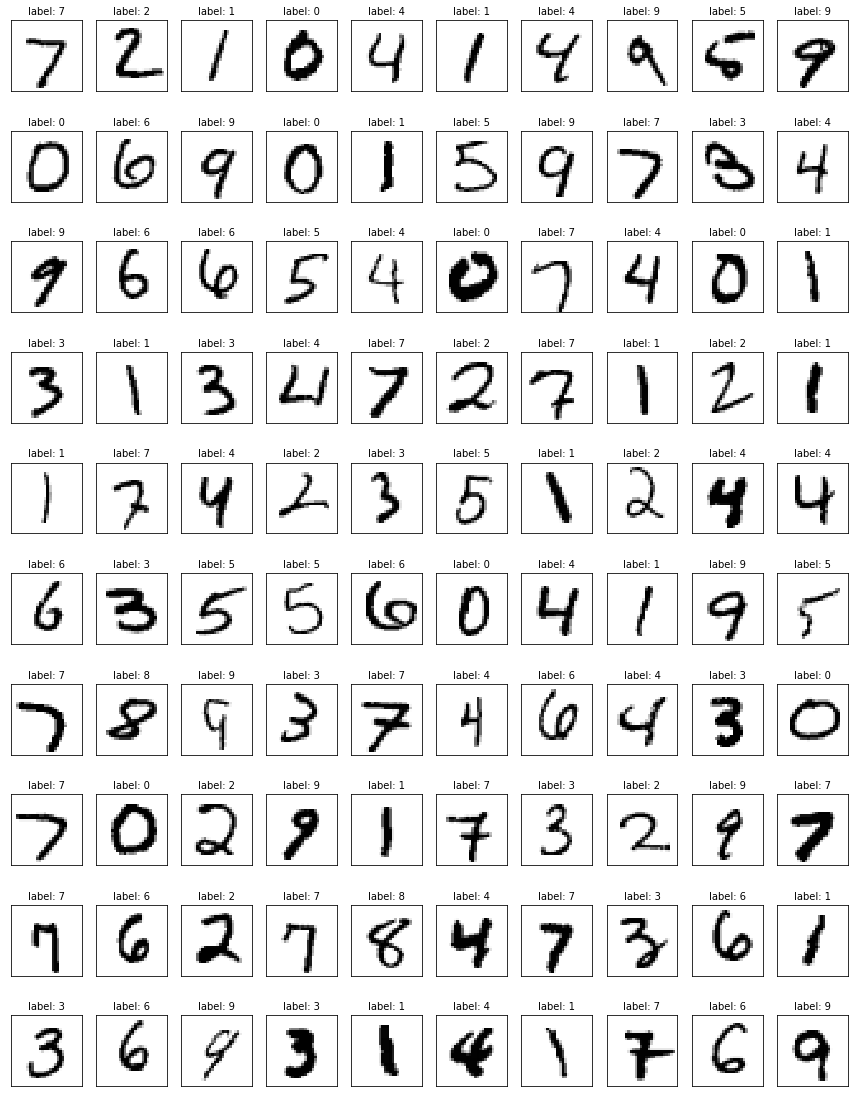

In [10]:
plot_images_labels_prediction(x_test_image, y_test_label, [], 0, 100)

In [11]:
print(x_train_image.shape)
print(y_train_label.shape)

(60000, 28, 28)
(60000,)


In [12]:
# x_train_image[0]

In [13]:
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [14]:
print(x_Train.shape)
print(x_Test.shape)

(60000, 784)
(10000, 784)


In [15]:
# x_Train[0]

In [16]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Train / 255

In [17]:
# x_Train_normalize[0]

In [18]:
# y_train_label[0]

In [19]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

In [20]:
# y_TrainOneHot[0]

# 建模

In [21]:
from keras.models import Sequential
from keras.layers import Dense

In [22]:
model = Sequential()

In [23]:
model.add(Dense(
    units = 256,
    input_dim = 784,
    kernel_initializer = 'normal',
    activation = 'relu',
))

In [24]:
model.add(Dense(
    units = 10,
    input_dim = 256,
    kernel_initializer = 'normal',
    activation = 'softmax',
))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# 訓練

In [26]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [27]:
train_history = model.fit(x = x_Train_normalize, y = y_TrainOneHot, validation_split = 0.2, epochs = 10, batch_size = 200, verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 5s - loss: 0.4401 - acc: 0.8856 - val_loss: 0.2193 - val_acc: 0.9383
Epoch 2/10
 - 3s - loss: 0.1860 - acc: 0.9464 - val_loss: 0.1484 - val_acc: 0.9597
Epoch 3/10
 - 3s - loss: 0.1307 - acc: 0.9621 - val_loss: 0.1244 - val_acc: 0.9650
Epoch 4/10
 - 3s - loss: 0.0988 - acc: 0.9721 - val_loss: 0.1092 - val_acc: 0.9681
Epoch 5/10
 - 3s - loss: 0.0781 - acc: 0.9781 - val_loss: 0.0980 - val_acc: 0.9704
Epoch 6/10
 - 3s - loss: 0.0641 - acc: 0.9825 - val_loss: 0.0910 - val_acc: 0.9724
Epoch 7/10
 - 3s - loss: 0.0524 - acc: 0.9860 - val_loss: 0.0880 - val_acc: 0.9730
Epoch 8/10
 - 3s - loss: 0.0428 - acc: 0.9883 - val_loss: 0.0819 - val_acc: 0.9750
Epoch 9/10
 - 3s - loss: 0.0362 - acc: 0.9907 - val_loss: 0.0812 - val_acc: 0.9748
Epoch 10/10
 - 3s - loss: 0.0303 - acc: 0.9924 - val_loss: 0.0786 - val_acc: 0.9765


In [28]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()    

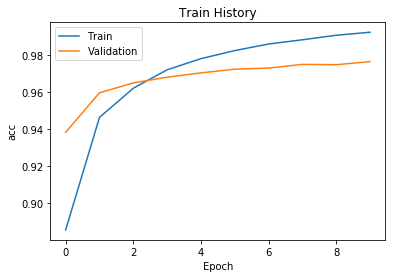

In [29]:
show_train_history(train_history, 'acc', 'val_acc')

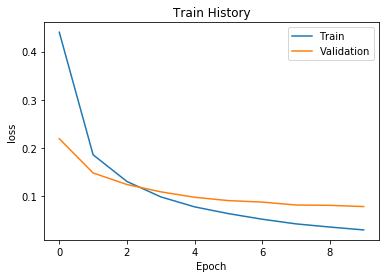

In [30]:
show_train_history(train_history, 'loss', 'val_loss')

# 預測

In [31]:
prediction = model.predict_classes(x_Test)

In [32]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

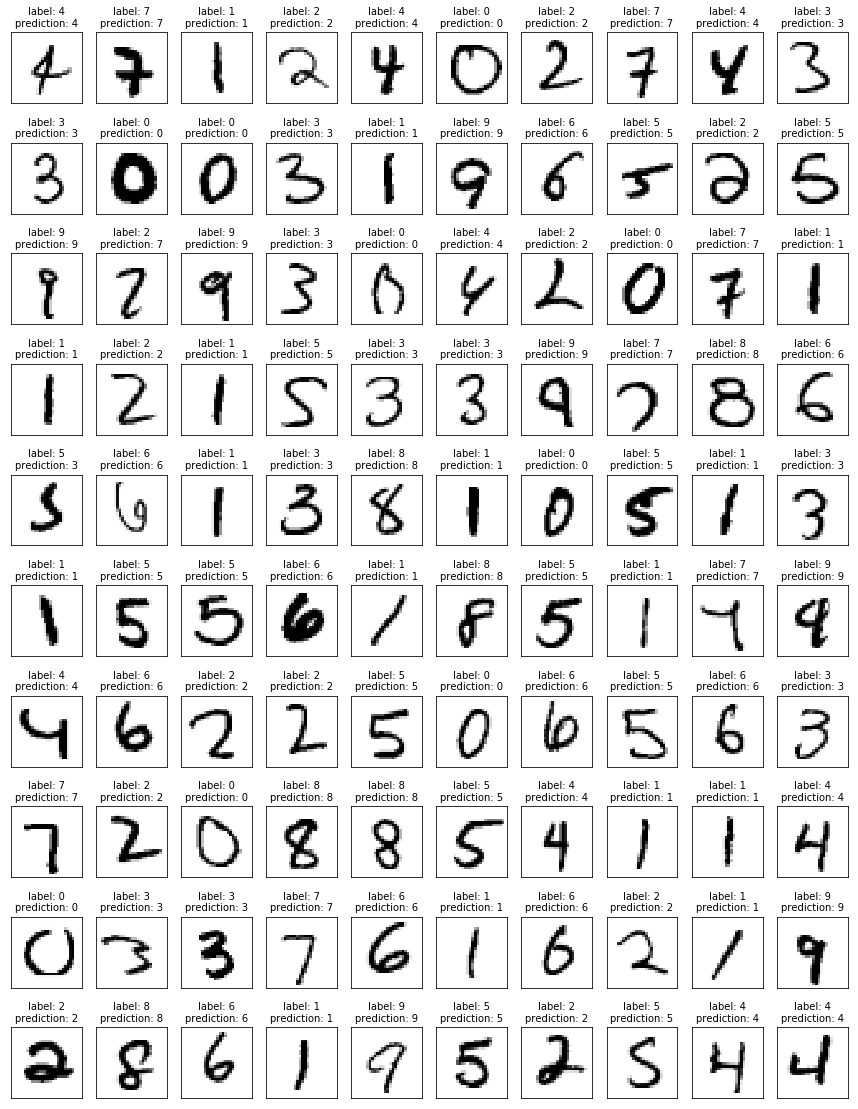

In [33]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, 300, 100)

# 準確率

In [34]:
pd.crosstab(y_test_label, prediction, rownames = ['label'], colnames = ['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,970,0,1,1,1,0,3,1,3,0
1,0,1124,3,1,0,0,2,0,5,0
2,4,0,1008,4,2,0,2,5,7,0
3,1,0,5,993,0,2,0,3,6,0
4,1,0,4,1,959,0,2,2,2,11
5,2,0,0,19,1,854,4,2,8,2
6,4,3,1,1,3,3,940,0,3,0
7,0,5,9,4,0,0,0,1001,3,6
8,3,0,3,7,3,0,1,2,952,3


In [35]:
df = pd.DataFrame({'label': y_test_label, 'predict': prediction})
df_correct = df[df.label == df.predict]
len(df_correct) / len(df)

0.9777